In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("data/other/phones-v1.csv")

<Axes: xlabel='Price Range'>

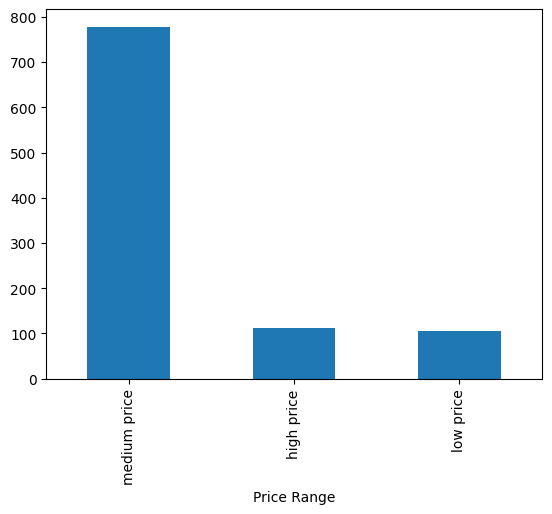

In [3]:
df["Price Range"].value_counts().plot.bar()

In [4]:
df.head()

,Brand,Model,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range
0,Apple,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price
1,Apple,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price
2,Samsung,Samsung Galaxy S9+,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price
3,Samsung,Samsung Galaxy S9+,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price
4,Samsung,Samsung Galaxy S9+,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price


In [5]:
df.describe()

,Storage (GB),RAM (GB),Weight (g),Display Size,Battery (mAh),Year,PPI Density
count,1011.000000,1011.000000,1011.000000,1011.000000,963.000000,1011.000000,1011.000000
mean,262.741840,7.066271,195.870623,6.530208,4537.714434,2021.754698,404.408506
std,215.449536,2.876769,27.198266,0.433248,774.920157,1.492942,69.283178
min,32.000000,2.000000,135.000000,4.700000,1821.000000,2017.000000,179.000000
25%,128.000000,4.000000,185.000000,6.430000,4352.000000,2021.000000,395.000000
50%,256.000000,6.000000,195.000000,6.600000,5000.000000,2022.000000,402.000000
75%,256.000000,8.000000,204.000000,6.700000,5000.000000,2023.000000,458.000000
max,1000.000000,16.000000,627.000000,12.400000,8000.000000,2024.000000,570.000000


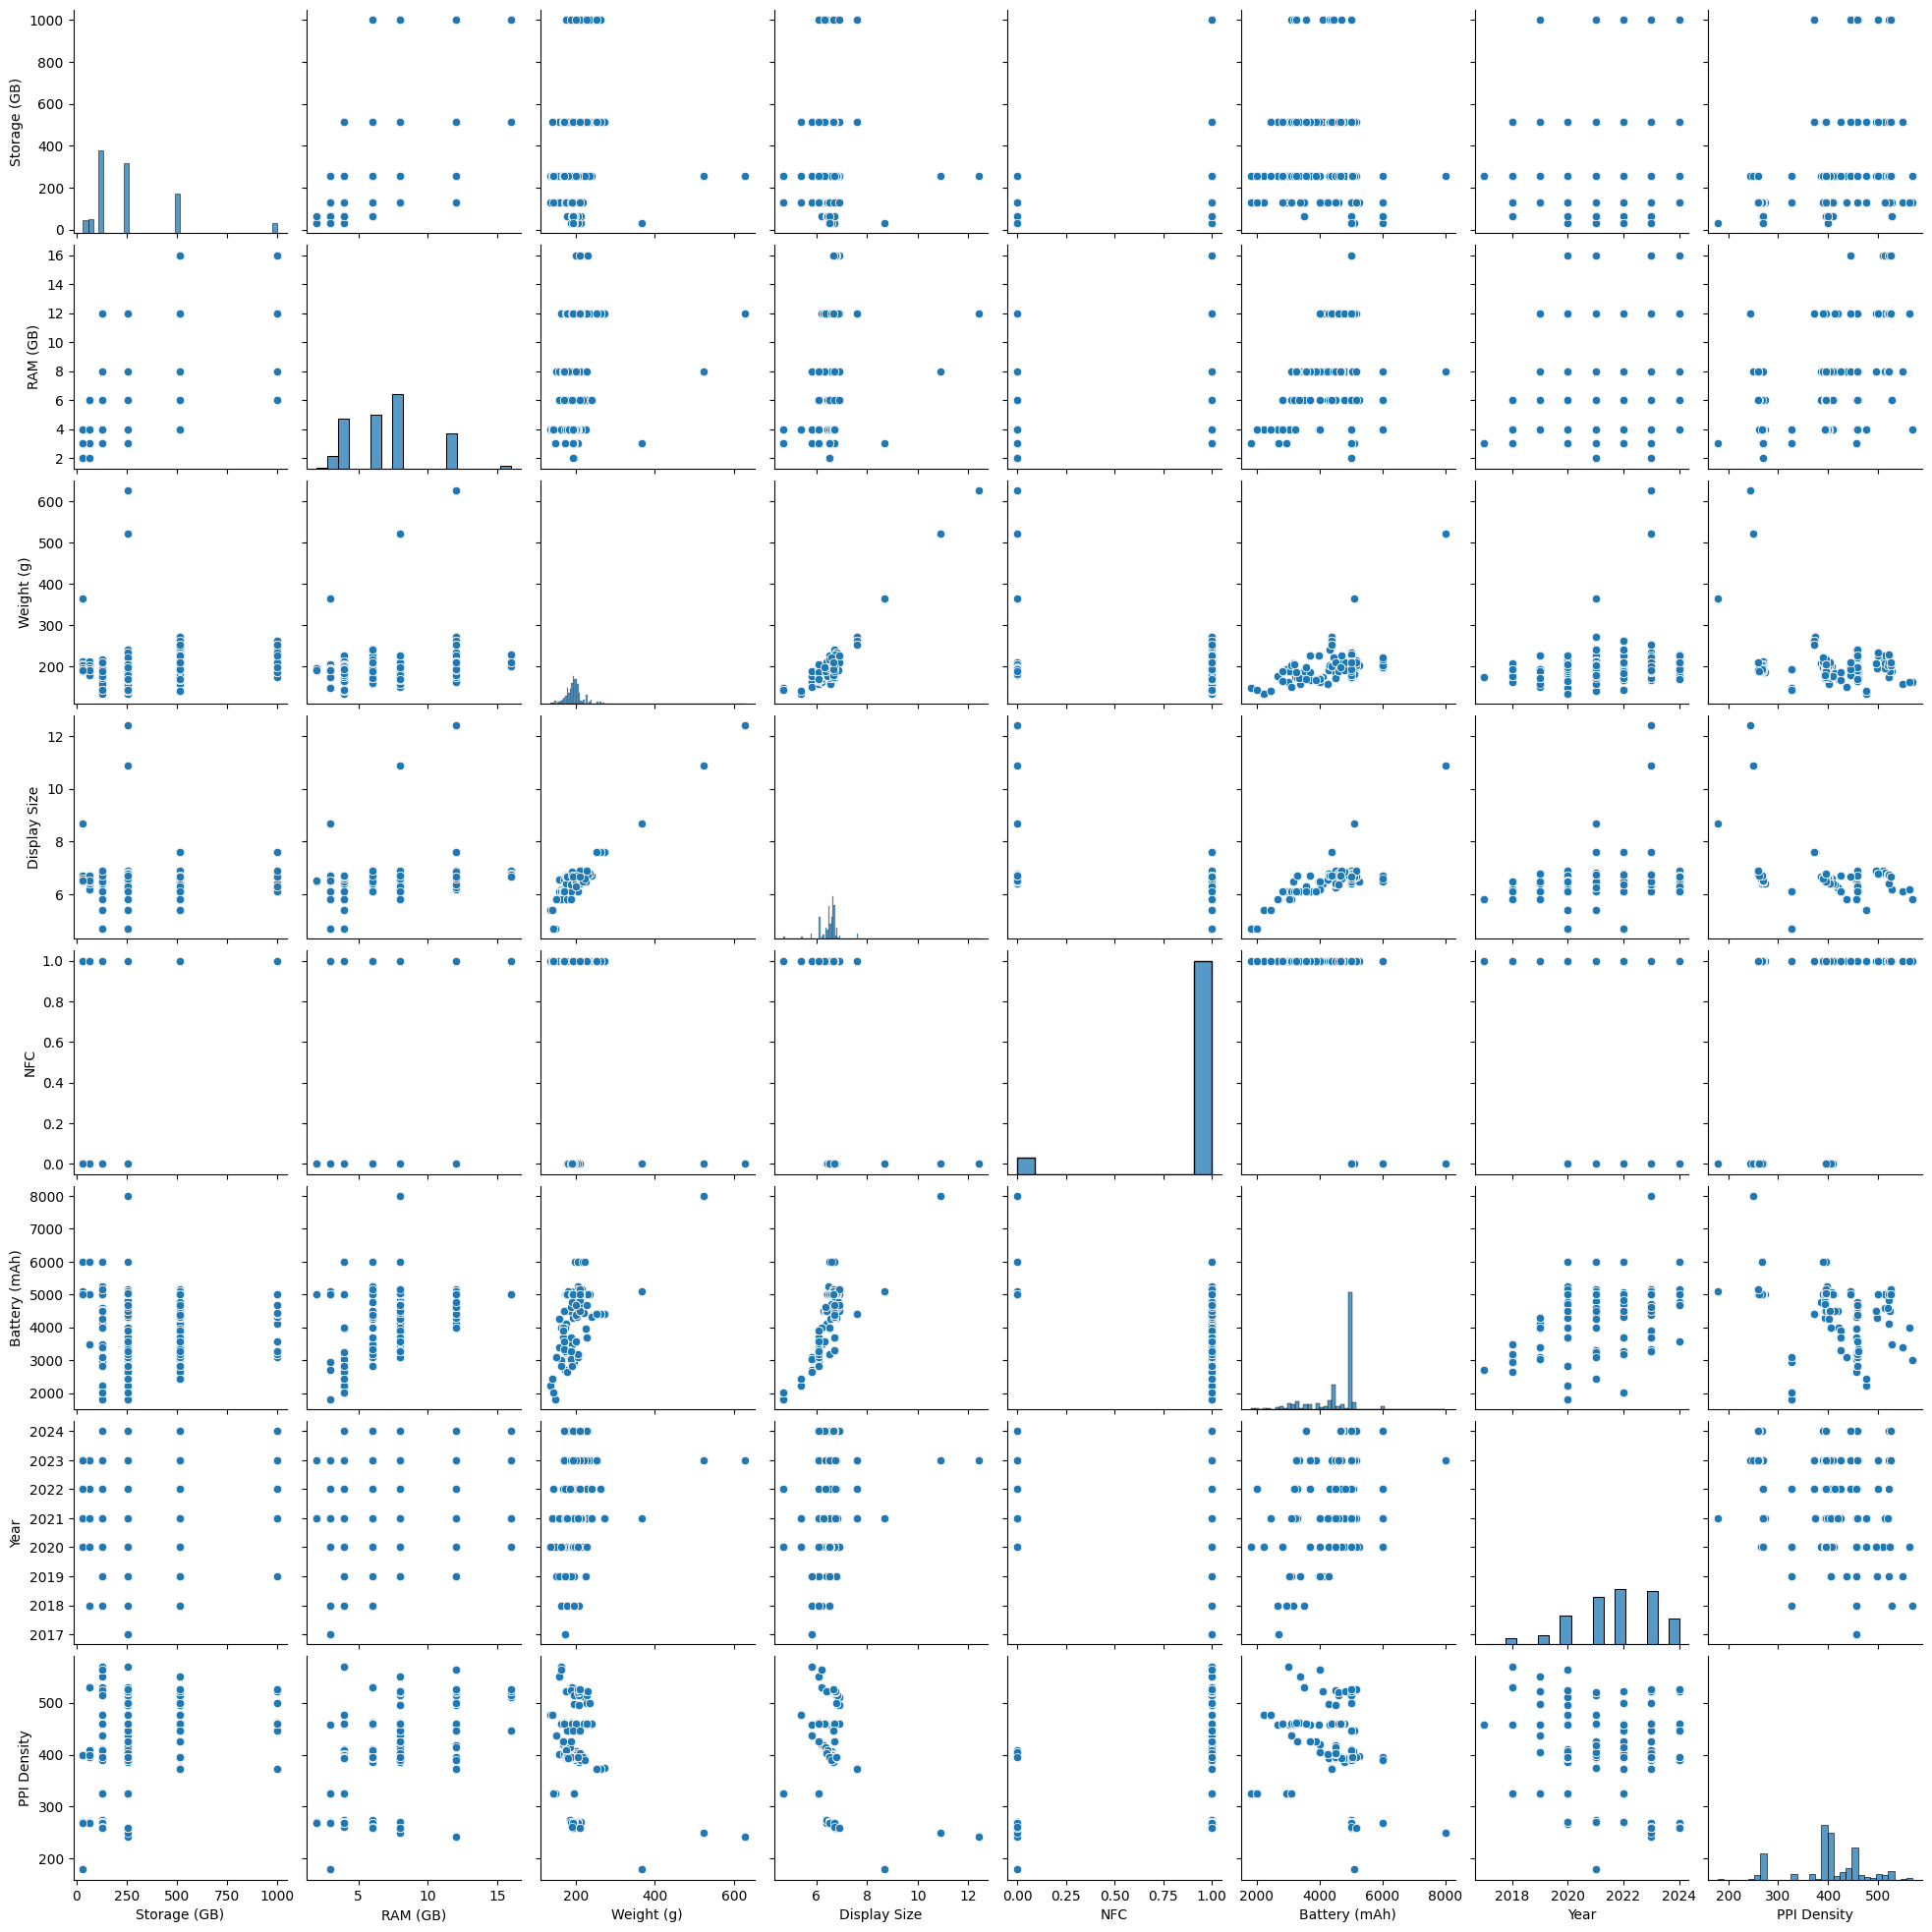

In [6]:
sns.pairplot(df)

<Axes: >

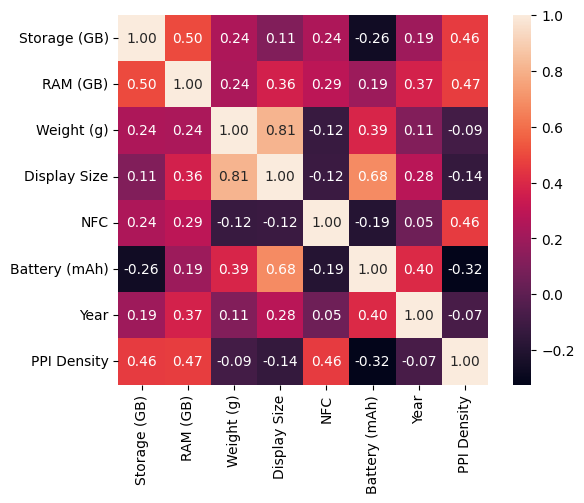

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", square=True)

In [8]:
df.isnull().sum()

Brand             0
Model            65
Storage (GB)      0
RAM (GB)          0
Launch            0
Dimensions        0
Weight (g)        0
Display Type      0
Display Size      0
OS                0
NFC               0
Battery (mAh)    48
CPU               0
Year              0
PPI Density       0
Price Range      15
dtype: int64

In [9]:
df.head()

,Brand,Model,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range
0,Apple,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price
1,Apple,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price
2,Samsung,Samsung Galaxy S9+,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price
3,Samsung,Samsung Galaxy S9+,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price
4,Samsung,Samsung Galaxy S9+,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price


In [10]:
df["Brand"].unique()

array(['Apple', 'Samsung', 'Xiaomi'], dtype=object)

In [11]:
df = pd.concat([df, pd.get_dummies(df["Brand"])], axis=1)
df.drop(columns=["Brand"], inplace=True)

In [12]:
df.head()

,Model,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi
0,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False
1,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False
2,Samsung Galaxy S9+,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False
3,Samsung Galaxy S9+,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False
4,Samsung Galaxy S9+,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False


In [13]:
df["Model"].unique().shape

(216,)

In [14]:
df.drop(columns=["Model"], inplace=True)

In [15]:
df.head()

,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi
0,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False
1,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False
2,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False
3,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False
4,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False


In [16]:
df["Launch"].unique().shape

(148,)

In [17]:
df.drop(columns=["Launch"], inplace=True)

In [18]:
df["Dimensions"]

0       143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in)
1       143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in)
2       158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in)
3       158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in)
4       158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in)
                            ...                      
1006    160.9 x 77.8 x 7.8 mm (6.33 x 3.06 x 0.31 in)
1007                  160.5 x 75.1 x 7.8 mm or 8.0 mm
1008    160.4 x 75.1 x 8.4 mm (6.31 x 2.96 x 0.33 in)
1009                  160.5 x 75.1 x 7.8 mm or 8.0 mm
1010    160.4 x 75.1 x 8.4 mm (6.31 x 2.96 x 0.33 in)
Name: Dimensions, Length: 1011, dtype: object

In [19]:
def preprocess_dimensions(value):
    if not pd.isna(value):
        values = value.split(" mm")[0].split(" x ")
        return [float(value) for value in values]
    return value

In [20]:
df[["Height", "Width", "Thickness"]] = df["Dimensions"].apply(preprocess_dimensions).tolist()

In [21]:
df.drop(columns=["Dimensions"], inplace=True)

In [22]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi,Height,Width,Thickness
0,256,3,174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False,143.6,70.9,7.7
1,256,3,174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False,143.6,70.9,7.7
2,64,6,189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False,158.1,73.8,8.5
3,128,6,189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False,158.1,73.8,8.5
4,256,6,189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False,158.1,73.8,8.5


In [23]:
df["Display Type"].unique()

array(['OLED', 'AMOLED', 'LCD'], dtype=object)

In [24]:
df = pd.concat([df, pd.get_dummies(df["Display Type"])], axis=1)
df.drop(columns=["Display Type"], inplace=True)

In [25]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi,Height,Width,Thickness,AMOLED,LCD,OLED
0,256,3,174.0,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False,143.6,70.9,7.7,False,False,True
1,256,3,174.0,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False,143.6,70.9,7.7,False,False,True
2,64,6,189.0,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False,158.1,73.8,8.5,True,False,False
3,128,6,189.0,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False,158.1,73.8,8.5,True,False,False
4,256,6,189.0,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False,158.1,73.8,8.5,True,False,False


In [26]:
df["OS"].unique()

array(['iOS', 'Android'], dtype=object)

In [27]:
df = pd.concat([df, pd.get_dummies(df["OS"])], axis=1)
df.drop(columns=["OS"], inplace=True)

In [28]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,Height,Width,Thickness,AMOLED,LCD,OLED,Android,iOS
0,256,3,174.0,5.8,True,2716.0,Hexa-Core,2017,458,high price,...,False,False,143.6,70.9,7.7,False,False,True,False,True
1,256,3,174.0,5.8,True,2716.0,Hexa-Core,2017,458,low price,...,False,False,143.6,70.9,7.7,False,False,True,False,True
2,64,6,189.0,6.2,True,3500.0,Octa-Core,2018,529,low price,...,True,False,158.1,73.8,8.5,True,False,False,True,False
3,128,6,189.0,6.2,True,3500.0,Octa-Core,2018,529,medium price,...,True,False,158.1,73.8,8.5,True,False,False,True,False
4,256,6,189.0,6.2,True,3500.0,Octa-Core,2018,529,high price,...,True,False,158.1,73.8,8.5,True,False,False,True,False


In [29]:
df["NFC"] = df["NFC"].astype(int)

In [30]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,Height,Width,Thickness,AMOLED,LCD,OLED,Android,iOS
0,256,3,174.0,5.8,1,2716.0,Hexa-Core,2017,458,high price,...,False,False,143.6,70.9,7.7,False,False,True,False,True
1,256,3,174.0,5.8,1,2716.0,Hexa-Core,2017,458,low price,...,False,False,143.6,70.9,7.7,False,False,True,False,True
2,64,6,189.0,6.2,1,3500.0,Octa-Core,2018,529,low price,...,True,False,158.1,73.8,8.5,True,False,False,True,False
3,128,6,189.0,6.2,1,3500.0,Octa-Core,2018,529,medium price,...,True,False,158.1,73.8,8.5,True,False,False,True,False
4,256,6,189.0,6.2,1,3500.0,Octa-Core,2018,529,high price,...,True,False,158.1,73.8,8.5,True,False,False,True,False


In [31]:
df["CPU"].unique()

array(['Hexa-Core', 'Octa-Core', 'Quad-Core'], dtype=object)

In [32]:
df["CPU"] = df["CPU"].map({"Quad-Core": 4, "Hexa-Core": 6, "Octa-Core": 8})

In [33]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,Height,Width,Thickness,AMOLED,LCD,OLED,Android,iOS
0,256,3,174.0,5.8,1,2716.0,6,2017,458,high price,...,False,False,143.6,70.9,7.7,False,False,True,False,True
1,256,3,174.0,5.8,1,2716.0,6,2017,458,low price,...,False,False,143.6,70.9,7.7,False,False,True,False,True
2,64,6,189.0,6.2,1,3500.0,8,2018,529,low price,...,True,False,158.1,73.8,8.5,True,False,False,True,False
3,128,6,189.0,6.2,1,3500.0,8,2018,529,medium price,...,True,False,158.1,73.8,8.5,True,False,False,True,False
4,256,6,189.0,6.2,1,3500.0,8,2018,529,high price,...,True,False,158.1,73.8,8.5,True,False,False,True,False


In [34]:
ordinal_encoder = OrdinalEncoder(
    categories=[["low price", "medium price", "high price"]],
    handle_unknown="use_encoded_value",
    unknown_value=np.nan,
)

In [35]:
df[["Price Range"]] = ordinal_encoder.fit_transform(df[["Price Range"]])

In [36]:
df.isnull().sum()

Storage (GB)      0
RAM (GB)          0
Weight (g)        0
Display Size      0
NFC               0
Battery (mAh)    48
CPU               0
Year              0
PPI Density       0
Price Range      15
Apple             0
Samsung           0
Xiaomi            0
Height            0
Width             0
Thickness         0
AMOLED            0
LCD               0
OLED              0
Android           0
iOS               0
dtype: int64

<Axes: >

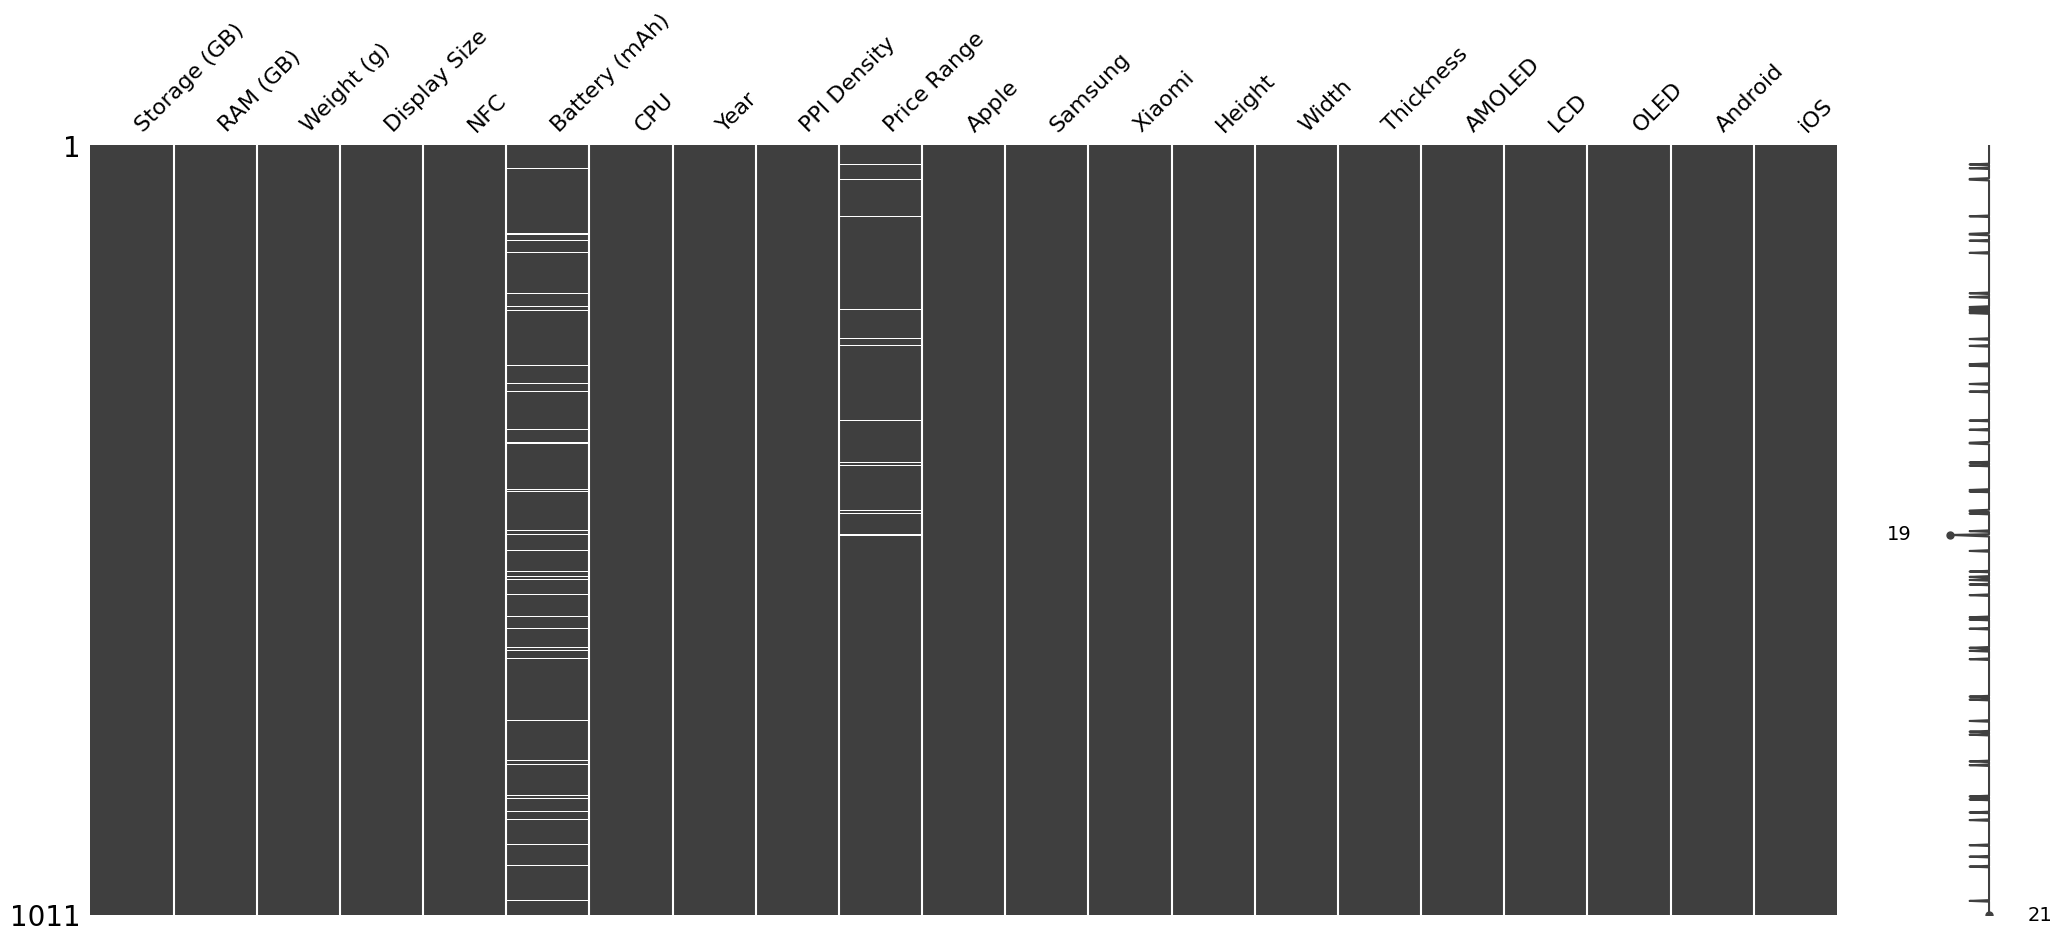

In [37]:
msno.matrix(df)

<Axes: >

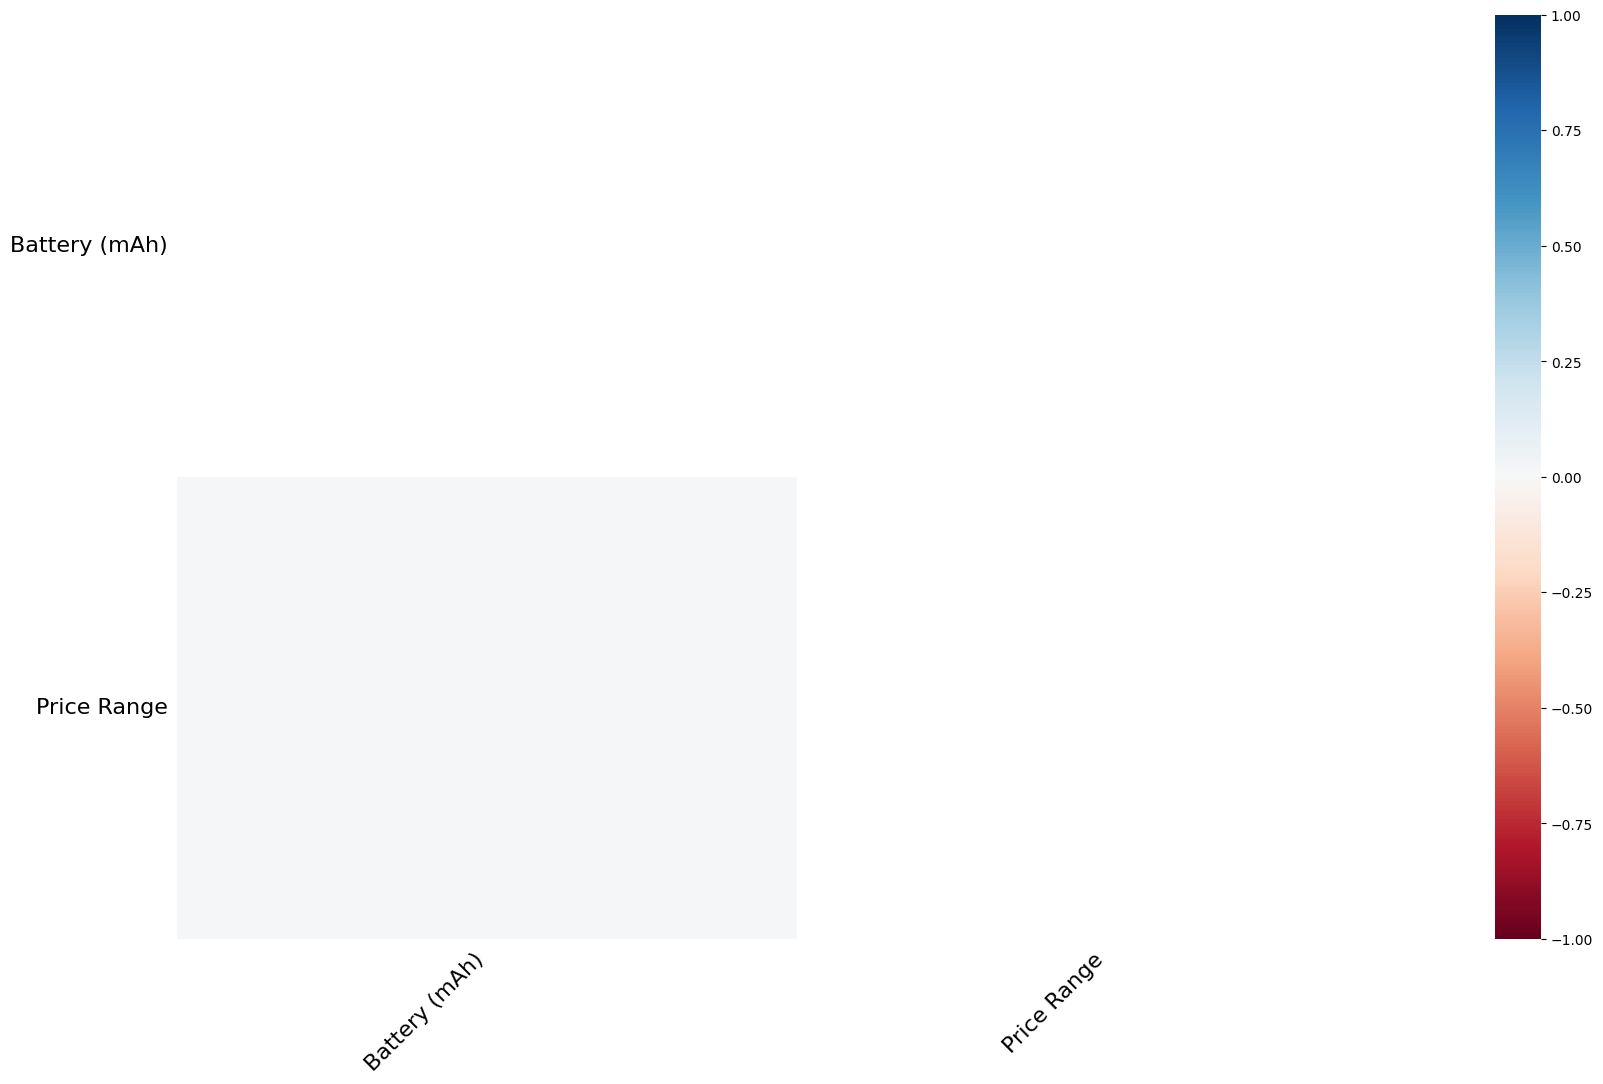

In [38]:
msno.heatmap(df)

<Axes: >

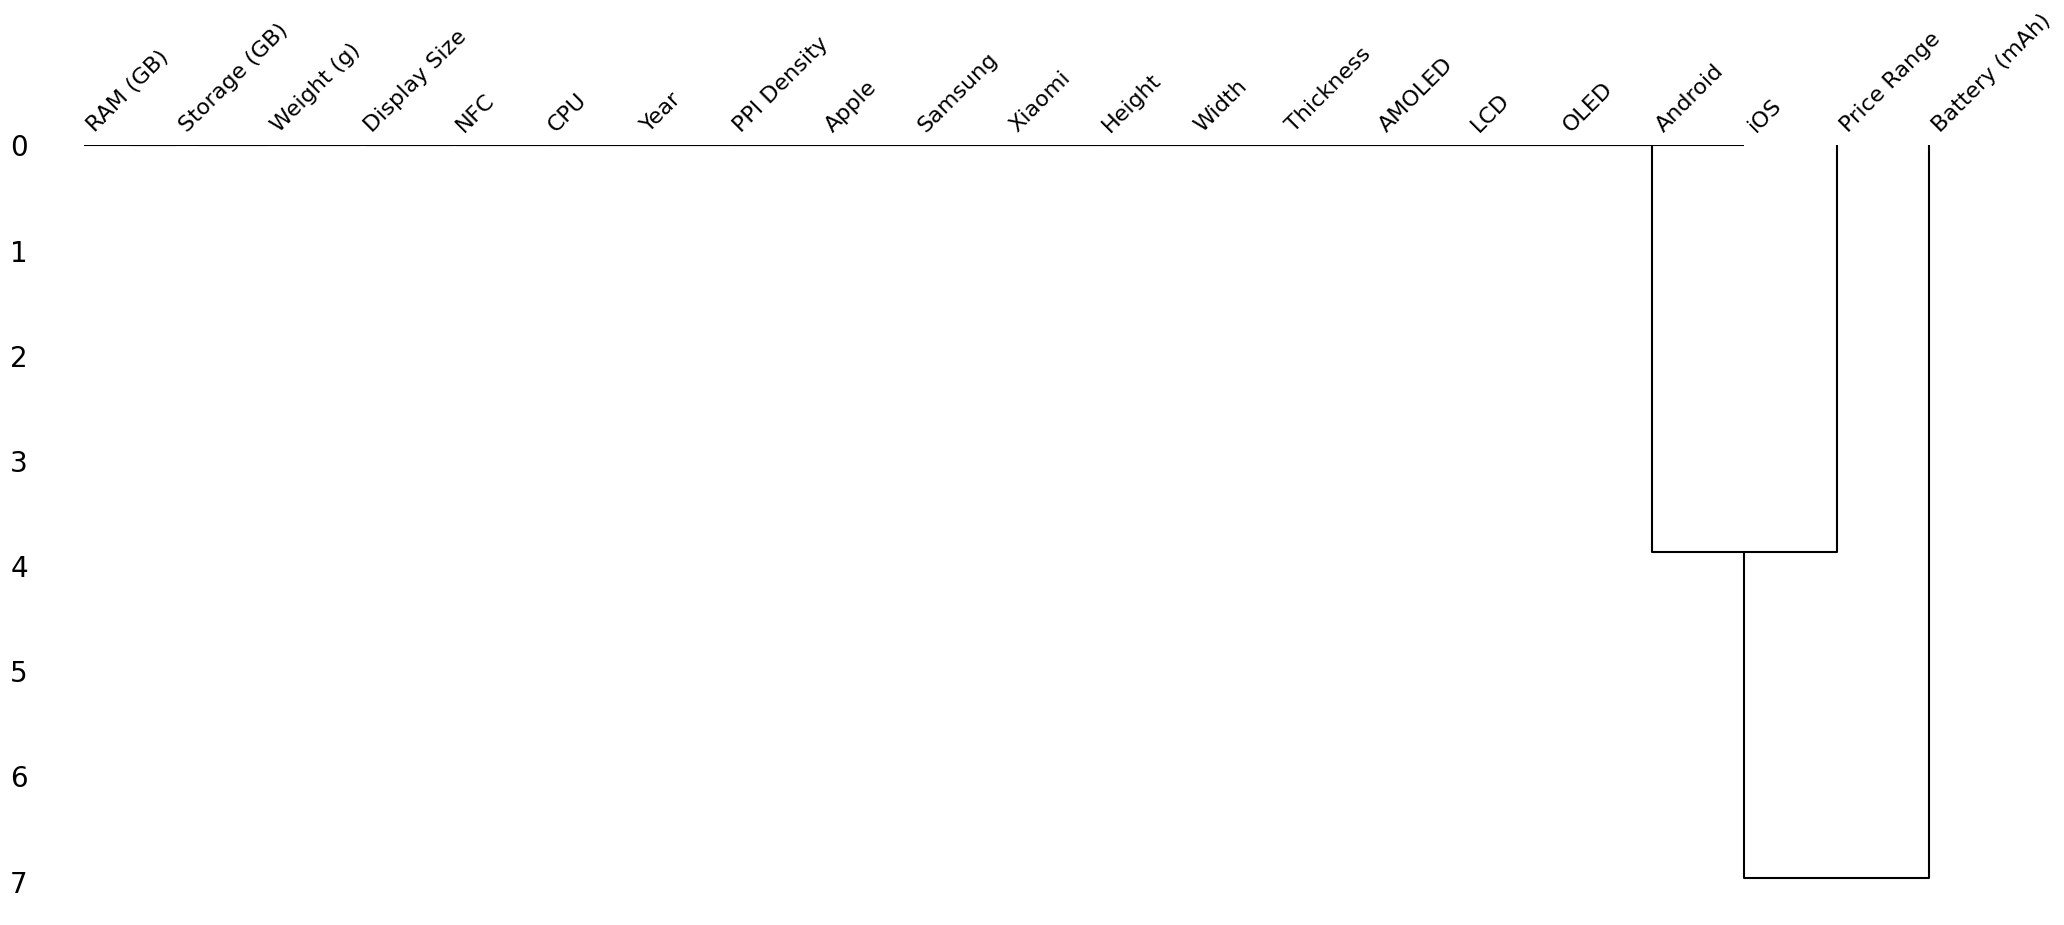

In [39]:
msno.dendrogram(df)

<Axes: >

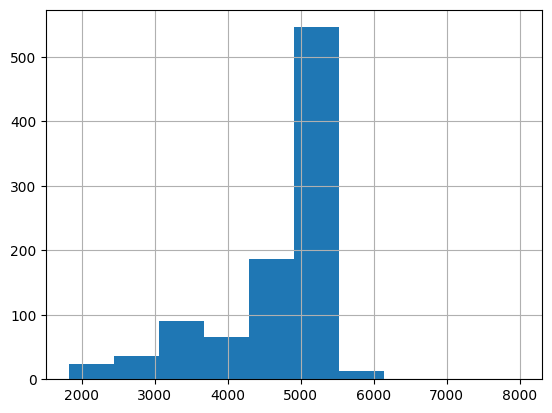

In [40]:
df["Battery (mAh)"].hist()

<Axes: >

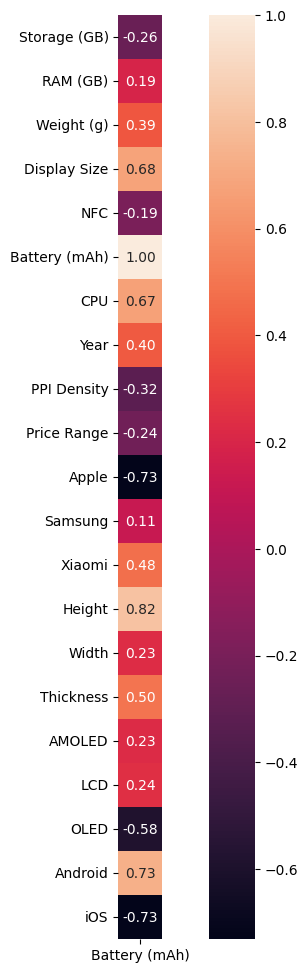

In [41]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only=True)[["Battery (mAh)"]], annot=True, fmt=".2f", square=True)

In [42]:
cols = ["Battery (mAh)", "Display Size", "CPU", "Apple", "Height", "Thickness", "OLED", "Android", "iOS"]

In [43]:
iterative_imputer = IterativeImputer()

In [44]:
df[cols] = iterative_imputer.fit_transform(df[cols])

In [45]:
df.isnull().sum()

Storage (GB)      0
RAM (GB)          0
Weight (g)        0
Display Size      0
NFC               0
Battery (mAh)     0
CPU               0
Year              0
PPI Density       0
Price Range      15
Apple             0
Samsung           0
Xiaomi            0
Height            0
Width             0
Thickness         0
AMOLED            0
LCD               0
OLED              0
Android           0
iOS               0
dtype: int64

In [46]:
df.dropna(subset=["Price Range"], axis=0, inplace=True)

In [47]:
df.isnull().sum()

Storage (GB)     0
RAM (GB)         0
Weight (g)       0
Display Size     0
NFC              0
Battery (mAh)    0
CPU              0
Year             0
PPI Density      0
Price Range      0
Apple            0
Samsung          0
Xiaomi           0
Height           0
Width            0
Thickness        0
AMOLED           0
LCD              0
OLED             0
Android          0
iOS              0
dtype: int64

In [48]:
df.shape

(996, 21)

In [49]:
X, y = df.drop(columns=["Price Range"]), df["Price Range"]

In [50]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [51]:
scaler = MinMaxScaler()

In [52]:
train_X = scaler.fit_transform(train_X)

In [53]:
test_X = scaler.transform(test_X)

In [54]:
classifier = LogisticRegression().fit(train_X, train_y)

In [55]:
pred_y = classifier.predict(test_X)

In [56]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.54      0.26      0.35        27
         1.0       0.81      0.92      0.86       156
         2.0       0.30      0.18      0.22        17

    accuracy                           0.77       200
   macro avg       0.55      0.45      0.48       200
weighted avg       0.73      0.77      0.74       200



In [57]:
classifier = KNeighborsClassifier().fit(train_X, train_y)

In [59]:
pred_y = classifier.predict(test_X)

In [60]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.62      0.48      0.54        27
         1.0       0.84      0.90      0.87       156
         2.0       0.38      0.29      0.33        17

    accuracy                           0.79       200
   macro avg       0.62      0.56      0.58       200
weighted avg       0.77      0.79      0.78       200



In [61]:
classifier = DecisionTreeClassifier().fit(train_X, train_y)

In [62]:
pred_y = classifier.predict(test_X)

In [63]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.53      0.63      0.58        27
         1.0       0.86      0.86      0.86       156
         2.0       0.42      0.29      0.34        17

    accuracy                           0.78       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.78      0.78      0.78       200



In [64]:
param_grid = {
    "criterion": ["entropy", "gini"],
    "max_depth": [None, 1, 2, 3, 4],
}

In [65]:
classifier = DecisionTreeClassifier()

In [66]:
grid_search = GridSearchCV(
    classifier,
    param_grid,
    scoring="f1_weighted",
    cv=5,
)

In [67]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 1, 2, 3, 4]},
             scoring='f1_weighted')

In [68]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [69]:
pred_y = grid_search.predict(test_X)

In [70]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.64      0.26      0.37        27
         1.0       0.83      0.94      0.88       156
         2.0       0.55      0.35      0.43        17

    accuracy                           0.80       200
   macro avg       0.67      0.52      0.56       200
weighted avg       0.78      0.80      0.77       200

